<a href="https://colab.research.google.com/github/RADHIKA-RAINA/FMML_Projects_and_Labs/blob/main/Mod3_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-4 : Understanding Cross-Validation and Standardization
#### Module Coordinator: Jashn Arora
---

# **Section 1: Tweaking the parameters**

Let's stat the lab by writing knn code on a cancer detection dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = cancer.data
y = cancer.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Section 1.1: Changing Value of K
Let's try to run the knn with different values of knn and compare the results

In [7]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

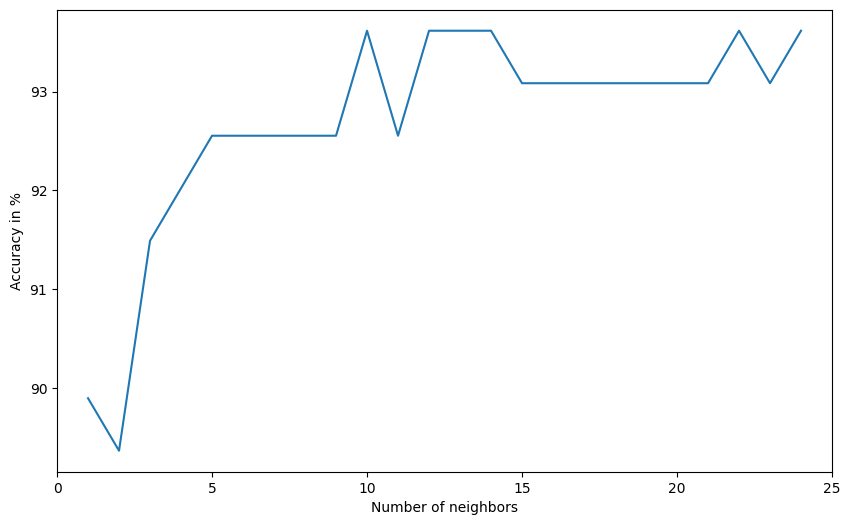

In [8]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [9]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In this case, we see that the ideal number of neighbours can take any one of the values in the list [10,12,13,14,22,24].  
However, this only tells us the effectiveness of the KNN classifier only if we have the same train-test split considered above. It still does not tell us how well the algorithm would perform if the test set were different. The results would have been different if we had split the data differently.

### AUC-ROC Curve

The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.  
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).    
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [10]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

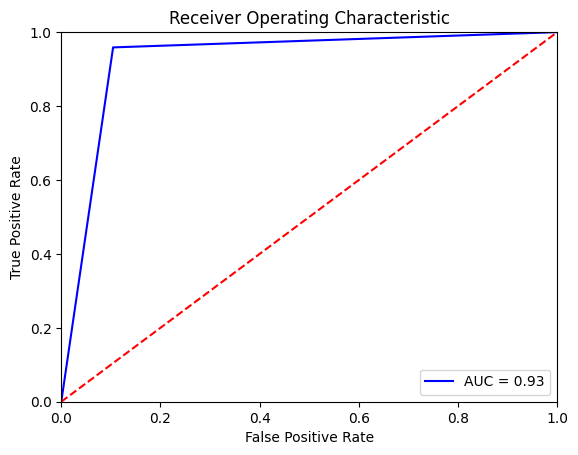

In [11]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

## Section 1.2: KNN using a different train-test split

In [12]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [13]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

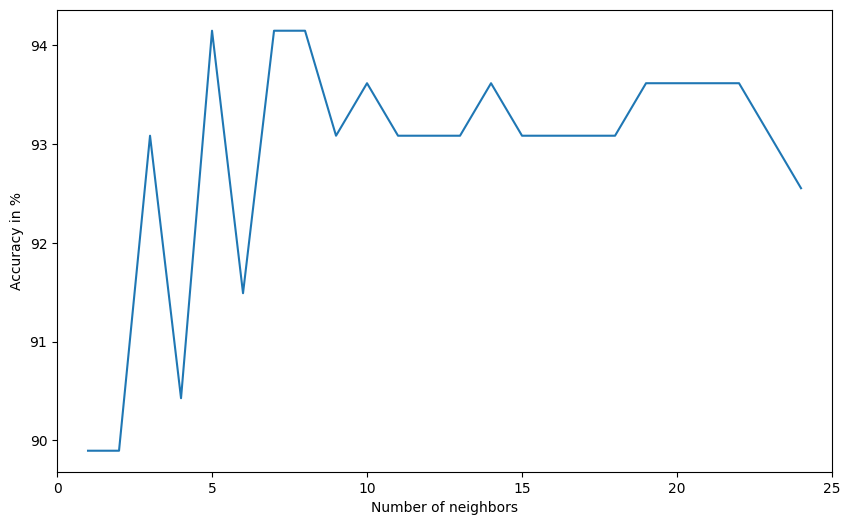

In [14]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [15]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


As you can see, the model gives different results when we split the data differently. Here, it suggests that the ideal k value is 5, 7 or 8.

# **Section 2: Cross Validation**

As you saw in the above two cases with different train-test splits, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.  

Cross Validation is an important technique in Machine Learning to analyze the performance of a model on **unseen** data.  

There are different kinds of cross-validation methods: exhaustive and non-exhaustive.   
Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.

One of the most commonly cross-validation methods is **K-Fold Cross validation**. The procedure for K-Fold Cross Validation is as follows:  
1. Split the dataset into k groups (typically without shuffling)
2. For each unique group:  
  a. Take the group as a hold out or test data set  
  b. Take the remaining groups as a training data set  
  c. Fit a model on the training set and evaluate it on the test set  
  d. Retain the evaluation score and discard the model  
3. Summarize the performance of the model using the mean of model evaluation scores over all the folds.

Image source: https://scikit-learn.org/stable/modules/cross_validation.html  
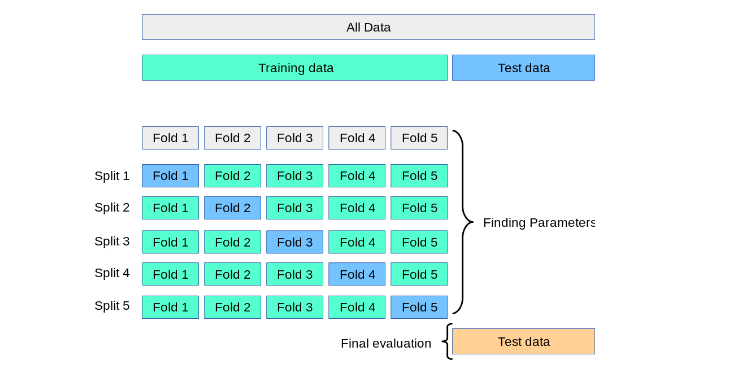

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [17]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

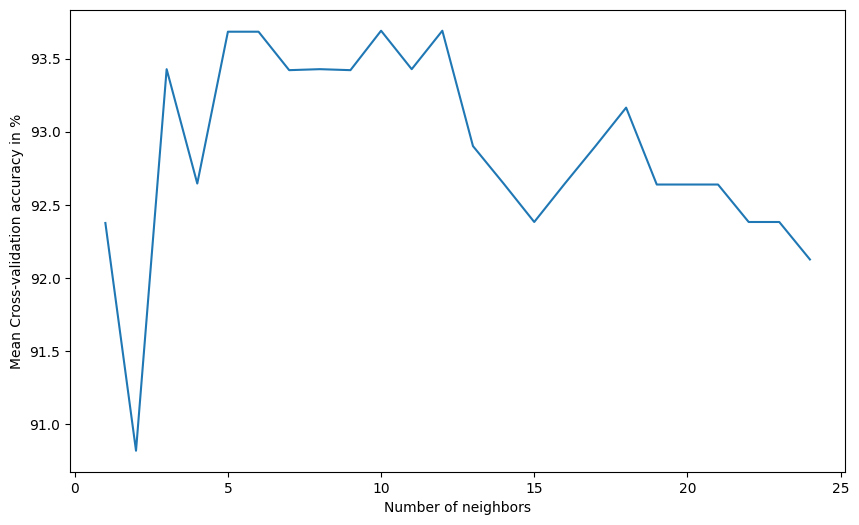

In [18]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [19]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


Note that the accuracy in the above case is not the accuracy on the test set. We plot the mean of the accuracies obtained during cross-validation, when we considered different splits of the training set.  

From the plot above, we can see that when the value of k is 10 or 12, our KNN model generalizes well to unseen data. Performing such cross validation gives us an idea about the parameters to choose when using a machine-learning algorithm.

In [21]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Initialize the StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5)

# List to store the accuracy for each fold
accuracies = []

# Perform Stratified KFold cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the Logistic Regression model (you can use other models as well)
    model = LogisticRegression(max_iter=10000)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Display the results (mean accuracy of the 5 folds)
mean_accuracy = np.mean(accuracies)
print(f"Accuracy for each fold: {accuracies}")
print(f"Mean Accuracy: {mean_accuracy}")


Accuracy for each fold: [0.9385964912280702, 0.9473684210526315, 0.9824561403508771, 0.9298245614035088, 0.9557522123893806]
Mean Accuracy: 0.9507995652848935


# **Section 3: Standardization**


Scaling the data that we have available is a recommended pre-processing step when working with many machine learning algorithms. The scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled, and the model may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.  

Standardization (also called z-score normalization) is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$


In [22]:
X = cancer.data
y = cancer.target

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [25]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

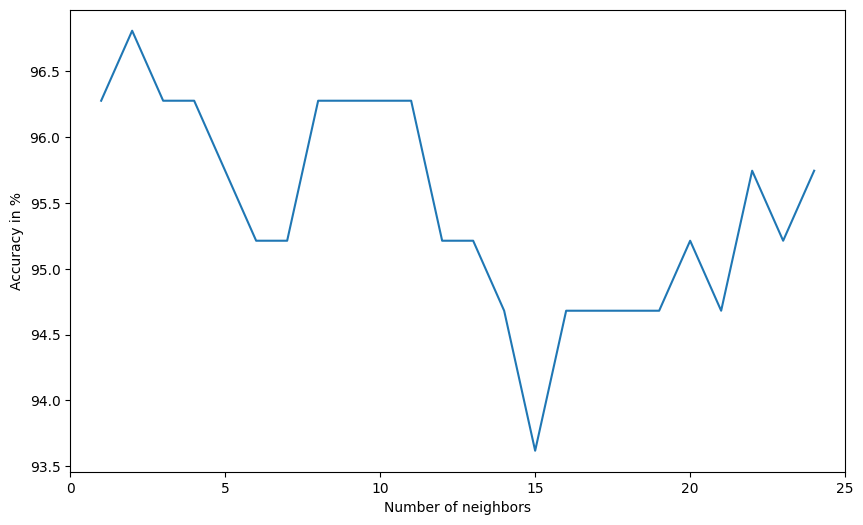

In [26]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [27]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


Optimal value of k: 9
Precision: 0.9646739130434783
Recall: 0.9943977591036415
F1-Score: 0.9793103448275862


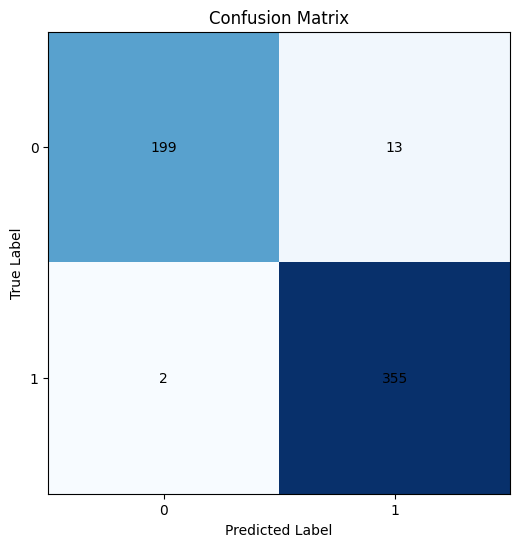

In [29]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score



# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal value of k for KNN using cross-validation
k_values = range(1, 21)  # Testing k values from 1 to 20
cv_scores = []

# Perform Stratified KFold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')  # Use 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the optimal k with the highest mean cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal value of k: {optimal_k}")

# Train the KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_scaled, y)

# Predict the labels
y_pred = knn.predict(X_scaled)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plot confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1])

# Add text annotations
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()


In [30]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results.
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5)

# List to store the accuracy for each fold
accuracies = []

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and testing sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the Logistic Regression model
    model = LogisticRegression(max_iter=10000)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Display the results
mean_accuracy = np.mean(accuracies)
print(f"Accuracy for each fold: {accuracies}")
print(f"Mean Accuracy: {mean_accuracy}")


Accuracy for each fold: [0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9911504424778761]
Mean Accuracy: 0.9754230709517155


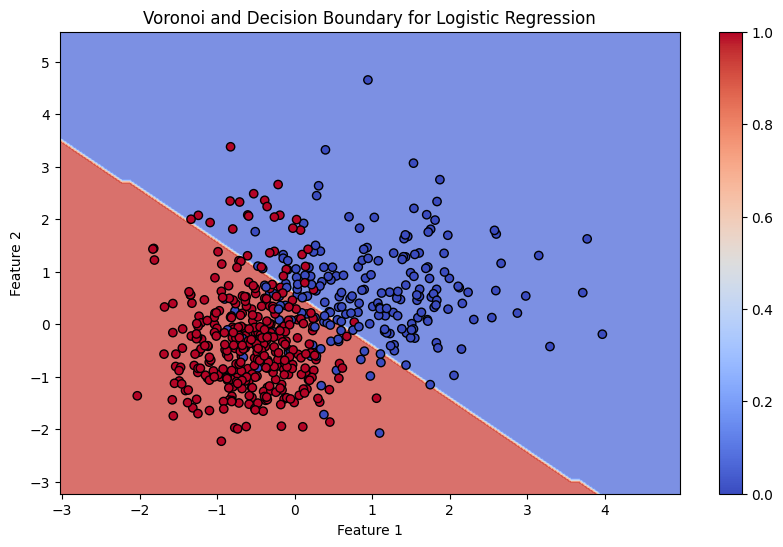

In [32]:
## TASK-4:
## Plot the vornoi and decision boundary diagram for the classifier from TASK-3
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Logistic Regression model using the entire dataset
model = LogisticRegression(max_iter=10000)
model.fit(X_scaled, y)

# Create a meshgrid to plot the decision boundaries
# Use the minimum and maximum values from the scaled features
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Create the feature matrix for prediction using all 30 features
# Stack the meshgrid points and fill the rest with zeros for other features
num_features = X_scaled.shape[1]  # Get the number of original features (30)
mesh_points = np.c_[xx.ravel(), yy.ravel()]
# Create an array with all zeros, and replace first two colums with mesh points
mesh_data = np.zeros((mesh_points.shape[0], num_features))
mesh_data[:, :2] = mesh_points

# Predict on each point in the meshgrid using the modified data
Z = model.predict(mesh_data)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)

# Overlay the original dataset points (using the first two features for visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

# Label the plot
plt.title("Voronoi and Decision Boundary for Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()  # Show colorbar to represent the class labels
plt.show()


### Questions to Think About and Answer
1. Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.  
What do you think are the pros/cons of this method ?  
2. Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.

### Useful Resources for further reading
1. Cross validation (scikit-learn): https://scikit-learn.org/stable/modules/cross_validation.html  
2. Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
3. Standardization: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/  
4. AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
